# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [ ]:
def getSphereVolumeExact(D, R):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекурентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi**(D/2)/ sp.gamma(1+D/2) * R**D
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [17]:
print(getSphereVolumeExact(3, 1))
print(getSphereVolumeExact(2, 3))
print(getSphereVolumeExact(3, 3))

4.188790204786391
28.274333882308138
113.09733552923257


<IPython.core.display.Javascript object>


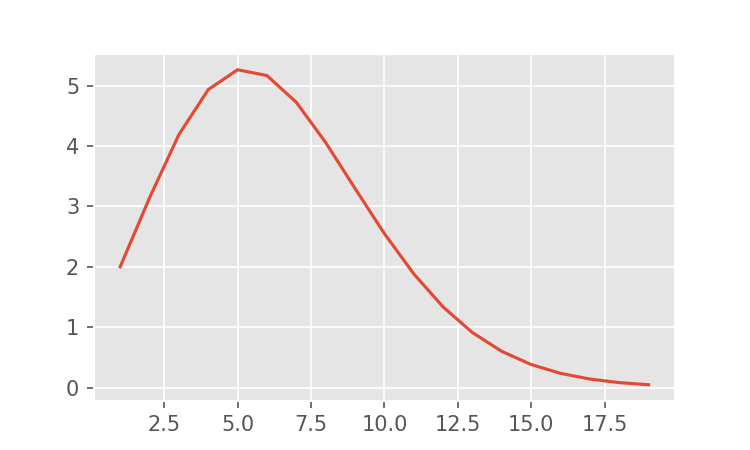

In [152]:
plt.figure(figsize=(5,3))
X = [i for i in range(1,20)]
X = np.array(X) 
plt.plot(X, getSphereVolumeExact(X, R=1))

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [ ]:
def getSphereVolumePseudorandom(N, D, R):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    k=0
    points = np.random.rand(N, D)*R
    for point in points:
        d = np.linalg.norm(point)
        #print(d)
        if d < R:
            k+=1
    V = ((2*R)**D) * (k/N)
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

In [21]:
def monte(N, D, R):
    V_ex = getSphereVolumeExact(D, R)
    V_r = getSphereVolumePseudorandom(N, D, R)
    e = abs((V_ex - V_r)/V_ex)
    return e

<IPython.core.display.Javascript object>


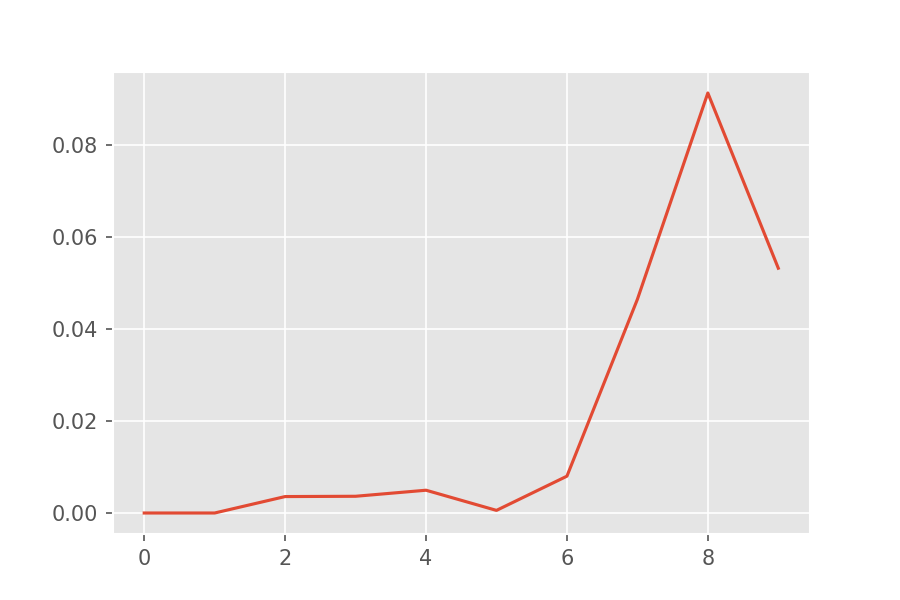

In [43]:
plt.figure(figsize=(6,4))
N = 10000
R = 1
nes = [D for D in range (0, 10)]
dots = [monte(N, D, R) for D in range (0, 10)]
plt.plot(nes,dots)

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [1]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [3]:
sobol_seq.i4_sobol_generate?

In [1]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    k=0
    sequence = sobol_seq.i4_sobol_generate(D, N)
    points = sequence*R
    for point in points:
        d = np.linalg.norm(point)
        if d < R:
            k+=1
    V = ((2*R)**D) * (k/N)
    
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

In [154]:
def monte1(N, D, R):
    V_ex = getSphereVolumeExact(D, R)
    V_q = getSphereVolumeQuasirandom(N, D, R)
    e = abs((V_ex - V_q)/V_ex)
    return e

<IPython.core.display.Javascript object>


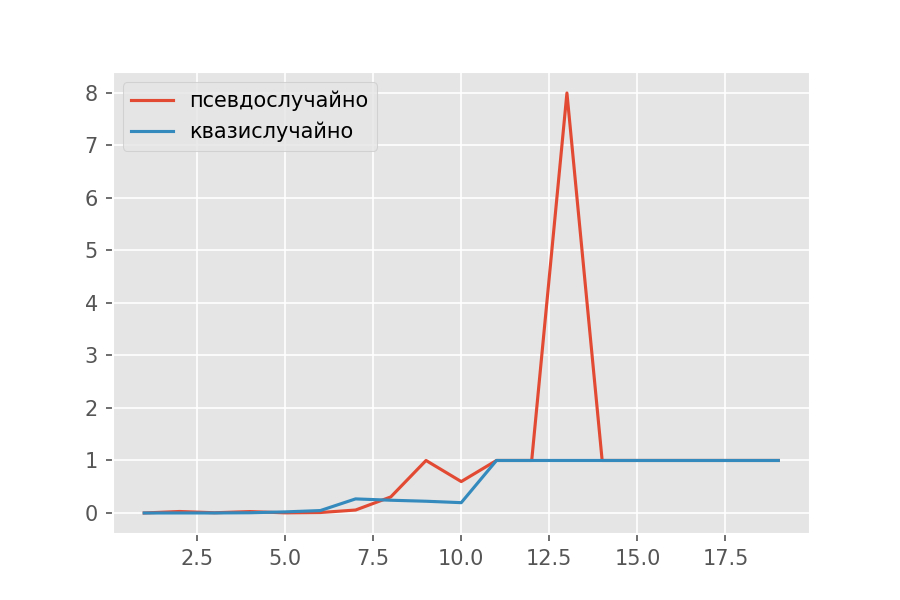

In [159]:
plt.figure(figsize=(6,4))
N = 1000
R = 1
nes = [D for D in range (1, 20)]
dots = [monte(N, D, R) for D in range (1, 20)]
dots1 = [monte1(N, D, R) for D in range (1, 20)]
plt.plot(nes,dots, '-', label='псевдослучайно')
plt.plot(nes,dots1, '-', label='квазислучайно')
plt.legend()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

При нескольких запусках видно что использование псевдослучайных чисел приводит к возникновении большой ошибки(скачет), однако график с псевдослучайной последовательностью ведет себя довольно плавно , не выходя на большие значения

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [2]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = np.random.rand(N,N)
    for raw in state:
        for i in range(len(state)):
            if raw[i] > 0.5:
                raw[i] = 1
            else:
                raw[i] = -1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [43]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота (при этом функция сама не мен яет сосотояния state)
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    N = len(state)
    temp = 0
    temp += state[i-1][j] if i > 0 >= 0 else 0
    temp += state[i+1][j] if i < N-1 >= 0 else 0
    temp += state[i][j-1] if j > 0 >= 0 else 0
    temp += state[i][j+1] if j < N-1 >= 0 else 0
    dE = 2 * state[i][j]*(temp)
    
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [44]:
def makeFlip(T, state):
    '''
    Функция расчитывает изменение энергии ячейки (i,j) в случае ее переворота
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = len(state)
    for item in range (N**2):
        out_arr = np.random.randint(low = N, size = 2)
        i = out_arr[0]
        j = out_arr[1]
        dE = getDeltaE(i, j, state)

        if dE >= 0 :
            p = np.random.rand()
            if p < np.exp(-dE/T):
                state[i][j] = -state[i][j]
            
        else:
            state[i][j] = -state[i][j]
            
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [46]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E = 0
    for i in range(len(state)):
        for j in range(len(state)):
            E += int(-getDeltaE(i, j, state)/2)
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [50]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    N = len(state)
    M = 0
    for i in range(N):
        for j in range(N):
            M+= state[i][j]
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [48]:
N       = 10         # размер решетки NxN
Nt      = 50         # количество точек температуры
eqSteps = 200        # количество раз выполнения makeFlip для установления равновесия
steps   = 50         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

<IPython.core.display.Javascript object>


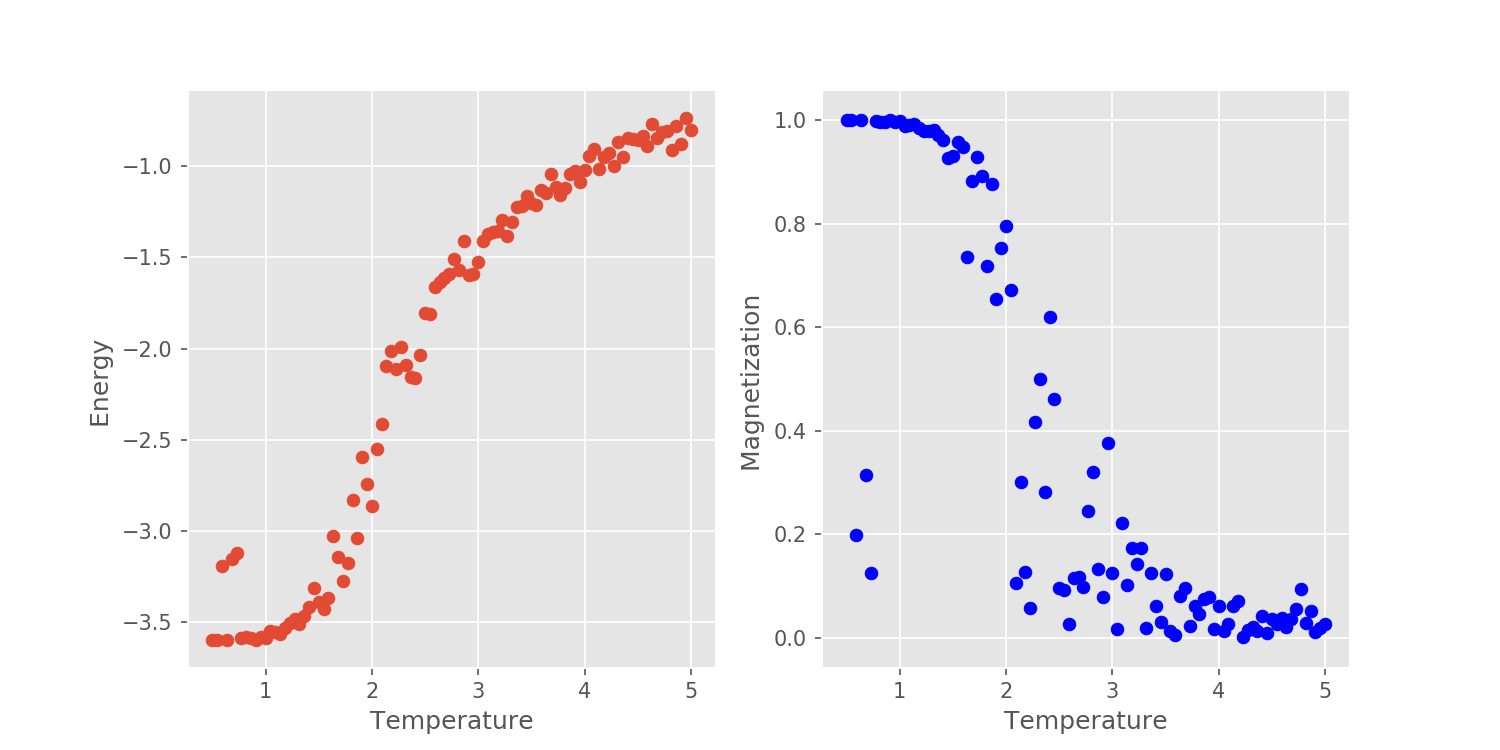

In [49]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Мы видим ненулевую намагниченность, похоже на поведение ферромагнетиков. При увеличении температуры намагниченность быстро уменьшается, структура разваливается.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [75]:
N = 64
state = getInitialState(N)

<IPython.core.display.Javascript object>


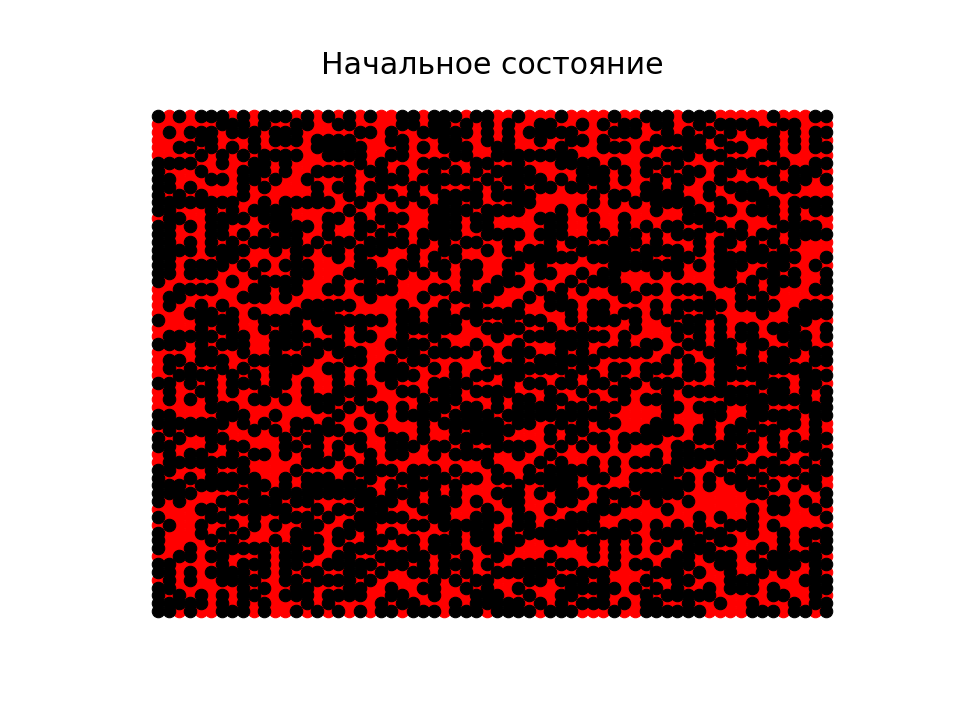

<IPython.core.display.Javascript object>


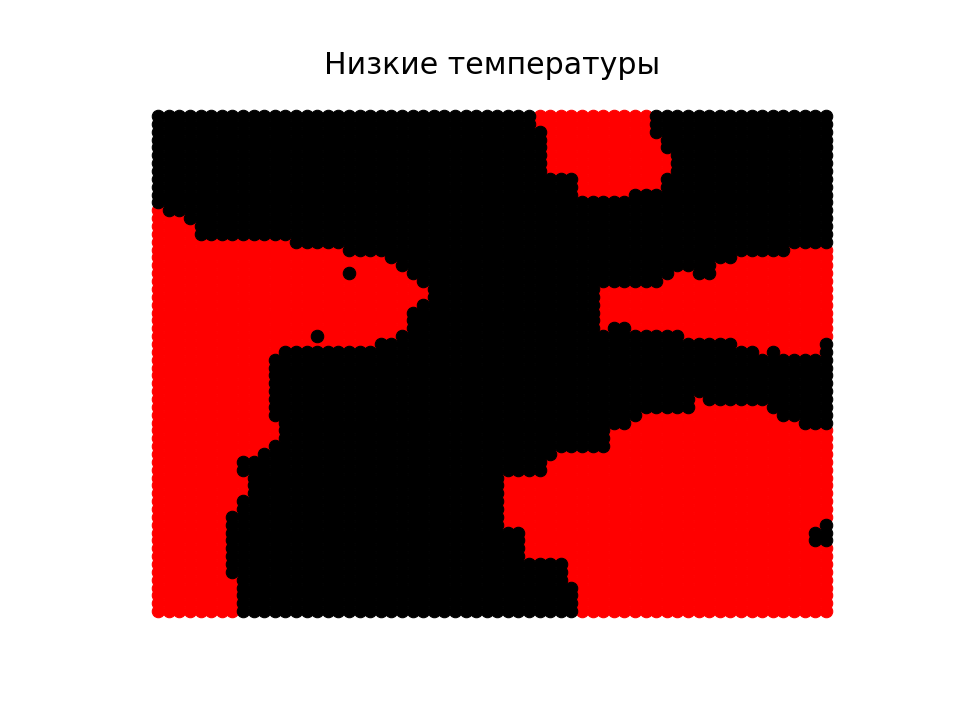

<IPython.core.display.Javascript object>


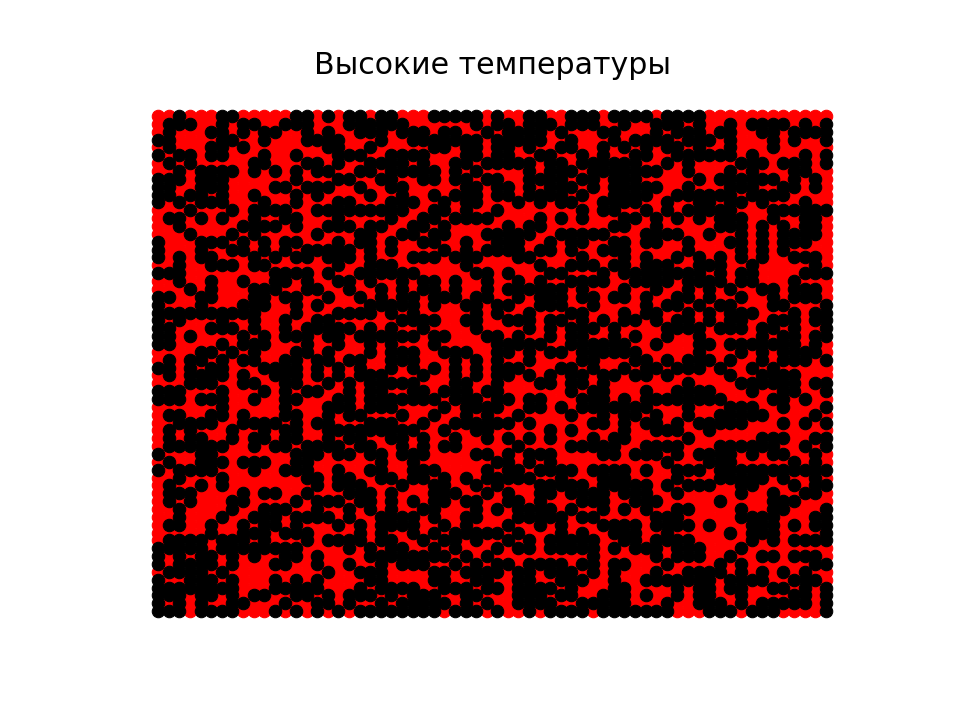

In [76]:
x = np.nonzero(state - 1)[1]
y = np.nonzero(state - 1)[0]
x1 = np.nonzero(state + 1)[1]
y1 = np.nonzero(state + 1)[0]
fig, ax = plt.subplots()
ax.scatter(x, y, c = 'red')
ax.scatter(x1, y1, c = 'black')
plt.axis('off')
plt.title('Начальное состояние')
plt.show()

steps = 50
for i in range (steps):
    makeFlip(1, state)   
x = np.nonzero(state - 1)[1]
y = np.nonzero(state - 1)[0]
x1 = np.nonzero(state + 1)[1]
y1 = np.nonzero(state + 1)[0]
fig, ax = plt.subplots()
ax.scatter(x, y, c = 'red')
ax.scatter(x1, y1, c = 'black')
plt.title('Низкие температуры')
plt.axis('off')
plt.show()

for i in range (steps):
    makeFlip(100, state)   
x = np.nonzero(state - 1)[1]
y = np.nonzero(state - 1)[0]
x1 = np.nonzero(state + 1)[1]
y1 = np.nonzero(state + 1)[0]
fig, ax = plt.subplots()
ax.scatter(x, y, c = 'red')
ax.scatter(x1, y1, c = 'black')
plt.title('Высокие температуры')
plt.axis('off')
plt.show()

Мы видим что при низких температурах появляются большие смежные области (магнитные домены) с одинаковым спином - намагниченность в одном направлении. На больших температурах такой же рандом как и в начальном состоянии. 